# Task 1: World map and statistic counting

In [1]:
import pandas as pd
import os
import glob
import smopy
import matplotlib.pyplot as plt
from matplotlib.colors import LinearSegmentedColormap
import numpy as np
from scipy import ndimage
from datetime import datetime
import imageio

In [2]:
df = pd.read_csv('df_all.csv', index_col=0, parse_dates=['datetime'])
df = df.loc[list(map(lambda x: isinstance(x, str),df['mode']))]
df.head()

C:\Users\lishi\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3331: DtypeWarning: Columns (5) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


,altitude,days_elapsed,latitude,longitude,mode,user_id,distance,speed,acceleration
datetime,,,,,,,,,
2008-03-28 14:54:40,-777.0,39535.621296,39.894178,116.318200,train,10.0,0.000000,0.000000,0.000000
2008-03-28 14:55:14,-777.0,39535.621690,39.894505,116.321132,train,10.0,253.375124,26.827954,0.219183
2008-03-28 14:56:13,-777.0,39535.622373,39.894953,116.326452,train,10.0,457.703187,27.927652,0.005177
2008-03-28 14:57:12,-777.0,39535.623056,39.894600,116.332542,train,10.0,522.318591,31.870287,0.018562
2008-03-28 14:58:11,-777.0,39535.623738,39.889622,116.337040,train,10.0,673.422399,41.090180,0.043408


### Plot the world map of trajectories

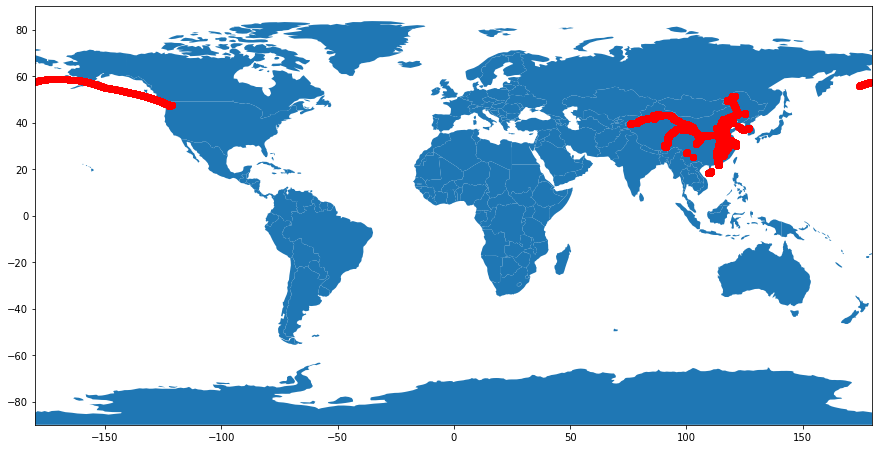

In [26]:
import plotly.express as px
import geopandas as gpd

gdf = gpd.GeoDataFrame(
    df, geometry=gpd.points_from_xy(df.longitude, df.latitude))
#px.set_mapbox_access_token(open(".mapbox_token").read())
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
ax = world.plot(figsize=(15,10))
ax.set_xlim([-180,180])
ax.set_ylim([-90,90])
# We can now plot our ``GeoDataFrame``.
gdf.plot(ax=ax, color='red')
plt.show()

## Counting trajectories

<AxesSubplot:xlabel='datetime'>

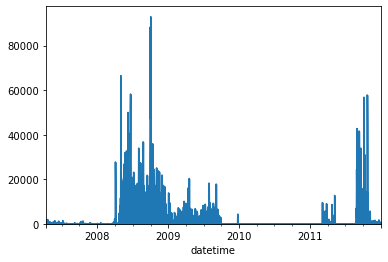

In [5]:
len(df.user_id.unique())
df.resample('D').count().latitude.plot(kind='area')

## Counting labels

<AxesSubplot:>

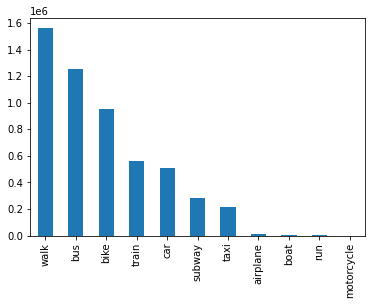

In [7]:
df['mode'].value_counts().plot(kind='bar')